In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/laurenelisegardiner/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [109]:
class BabyNames(object):    
    def __init__(self, path): 
        newlist = []
        columns = ['state','sex','year', 'name', 'occurances']

        for filename in os.listdir(path):
            if filename.endswith('.TXT'):
                df = pd.read_csv(join(path, filename), names=columns)
                newlist.append(df)
        self.names = pd.concat(newlist,ignore_index = True)
        
        def add_prop(group):
            group['prop'] = group.occurances / group.occurances.sum()
            return group
    
        self.names = self.names.groupby(['year','state']).apply(add_prop)
    
    def Count(self, state = '', year = ''): 
        if state == '': 
            state = self.names.state
        if year == '':
            year = self.names.year
        return(self.names[(self.names.state.isin([state])) & (self.names.year.isin([year]))]['occurances'].sum())
        
    
    def Top10BabyNames(self, state ='', year = ''):
        if state == '': 
            state = self.names.state
        if year == '':
            year = self.names.year
        t = self.names[(self.names.state.isin([state])) & (self.names.year.isin([year]))]                                              
        data = {'Male': t[t.sex == "M"].groupby('name').sum().sort_values(by = 'occurances', ascending = False).head(10).index.values,
                'Female': t[t.sex == "F"].groupby('name').sum().sort_values(by = 'occurances', ascending = False).head(10).index.values
            }
        df = pd.DataFrame(data, index = range(1,11))
        df.index.name = "Rank"
        return(df)
        
    def ChangeOfPopularity(self, fromYear=2014, toYear=2015, top=10):
        fromYear = self.names[self.names.year == fromYear][['name', 'occurances']].groupby('name').sum()
        toYear = self.names[self.names.year == toYear][['name', 'occurances']].groupby('name').sum()
        year2year = pd.merge(fromYear, toYear, right_index=True, left_index=True)
        year2year['diff'] = year2year['occurances_y'] - year2year['occurances_x']
        popularNames = toYear.sort_values(by = 'occurances', ascending = False).head(top).index.values
        morePopular = year2year.sort_values(by = 'diff', ascending = False).head(top).index.values
        lessPopular = year2year.sort_values(by = 'diff').head(top).index.values
        return "Names that increased in popularity: ", morePopular, "Names that increased in popularity: ",\
                lessPopular, "Names that are popular (by rank): ", popularNames
        
        
#     def Top5NamesPerYear(self, year=2015,sex=''):


    def NamePopularityPlot(self, name='Jim', yearRange=(2000,2015), state='IL', sex='M'):
        startYear = yearRange[0]
        endYear = yearRange[1]
        
        years = []
        props = []
        for year in range(startYear, endYear + 1):
            years.append(year)
            if self.names[(self.names.name == name) & (self.names.year == year) &\
                           (self.names.state == state)][['prop']].empty:
                props.append(0.0)
            else:
                props.append(self.names[(self.names.name == name) & (self.names.year == year) &\
                                        (self.names.state == state)][['prop']].iloc[0])
        plt.bar(years, props)
        plt.xlabel('Year')
        plt.ylabel('Proportion')
        plt.title('Change of Proportion of Birth Name')
        
    #def NameFlip(n=10):
        



In [110]:
mypath = '../data/namesbystate/'
test = BabyNames(mypath)

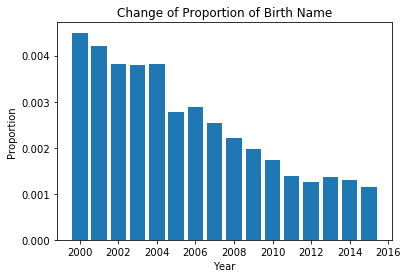

In [113]:
test.NamePopularityPlot(name='Sarah')